In [35]:
# Importer les packages
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [37]:
# Chargement de la base de données
(X_train,y_train),(x_test,y_test)=cifar10.load_data()

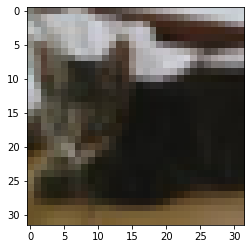

In [38]:
plt.imshow(X_train[9])

In [39]:
# Normaliser les photos
X_train=X_train/255.0
x_test=x_test/255.0

In [40]:
# Créer mon model
model=Sequential()

In [41]:
# Crèer le réseau de convolution (CNN)
model.add(Conv2D(256,(3,3),input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [42]:
model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [43]:
model.add(Flatten())

In [45]:
# Le complétement connecté
model.add(Dense(64))
model.add(Dense(10)) #dix categorie de photo
model.add(Activation('sigmoid'))
model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['sparse_categorical_accuracy'])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 256)       7168      
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)       590080    
_________________________________________________________________
activation_7 (Activation)    (None, 13, 13, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)             

In [47]:
# Entrainer le modèle
model.fit(X_train, y_train, batch_size=64, epochs=10)

Epoch 1/10
782/782 [==============================] - 18s 22ms/step - loss: 1.6329 - sparse_categorical_accuracy: 0.4096
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 1.2088 - sparse_categorical_accuracy: 0.5666
Epoch 3/10
782/782 [==============================] - 18s 23ms/step - loss: 1.0372 - sparse_categorical_accuracy: 0.6350
Epoch 4/10
782/782 [==============================] - 18s 23ms/step - loss: 0.9242 - sparse_categorical_accuracy: 0.6771
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.8303 - sparse_categorical_accuracy: 0.7120
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.7598 - sparse_categorical_accuracy: 0.7365
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 0.6930 - sparse_categorical_accuracy: 0.7597
Epoch 8/10
782/782 [==============================] - 18s 23ms/step - loss: 0.6441 - sparse_categorical_accuracy: 0.7776
Epoch 9/10
782/782 [============

In [48]:
test_loss,test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9672 - sparse_categorical_accuracy: 0.6948
